In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir("..")

sns.set_style("darkgrid")

[Text(0.5, 0, 'Mean player count in 2017-2020'),
 Text(0, 0.5, 'Steam game tag')]

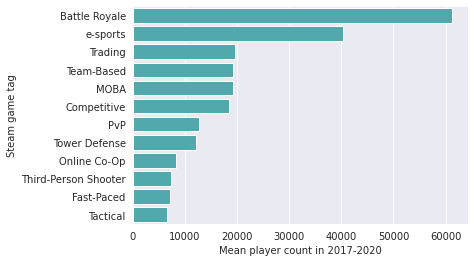

In [2]:
#plot1
top = pd.read_csv('./datasets/generated/genres_count_overall_top_12.csv') 
p1 = sns.barplot(x='count', y='genre', color='#42b7bd', data = top)
p1.set(xlabel='Mean player count in 2017-2020', ylabel='Steam game tag')


2017/12


/tmp/ipykernel_5269/3207036456.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  p2.set_xticklabels(ticks ,rotation=45)


[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Mean player count (monthly)')]

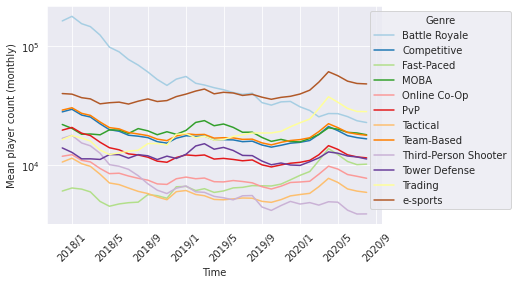

In [3]:
#plot2
genres_montly = pd.read_csv('./datasets/generated/genres_count_monthly_top_12.csv')
genres_montly['date'] = pd.to_datetime(genres_montly[['year', 'month']].assign(DAY=1))

p2 = sns.lineplot(x ='date', y ='count', hue = 'genre', data = genres_montly, palette="Paired")
p2.legend(title = "Genre",loc='upper right', bbox_to_anchor=(1.4, 1))
p2.set(yscale="log")
ticks = ["{}/{}".format(x.year, x.month) for x in genres_montly['date']]
print(ticks[1 + 4*8])
ticks[8*4 + 1] = "2020/9"

ticks = ticks[1::4]

p2.set_xticklabels(ticks ,rotation=45)
p2.set(xlabel="Time", ylabel="Mean player count (monthly)")


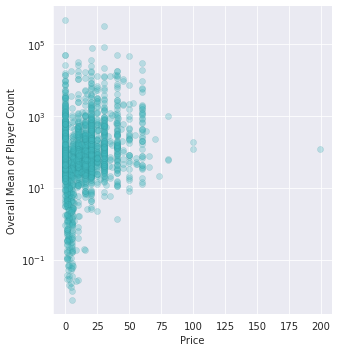

In [4]:
#plot3
free_df = pd.read_csv('./datasets/applicationTags.csv') 
free_df = free_df[(free_df == 'Free to Play').any(axis=1)]
free_df.columns = [str(i) for i in range(0, len(free_df.columns))]
free_df = free_df[['0']]
free_df = free_df.rename(columns = {'0':'id'})
initial_free = [str(0) for i in range(0, len(free_df))]
free_df['initialprice'] = initial_free

price_df = pd.read_csv('./datasets/generated/prices_count_total.csv')
counts = pd.read_csv('./datasets/generated/player_count_monthly.csv')
df = pd.merge(free_df, counts, how='inner', on=['id'])
df = df.groupby(["id"] + ['initialprice']).mean().reset_index()
df = df.drop(columns=['year', 'month'])
price_df = price_df.drop(columns=['finalprice', 'discount'])
final = pd.concat([price_df, df])


p3 = sns.relplot(x='initialprice', y='count', color='#42b7bd', alpha = 0.3, edgecolor = '#32979d', data = final)
p3.set(xlabel='Price', ylabel='Overall Mean of Player Count')
p3.set(yscale="log")
# plt.ylim(0, 2000)
# plt.xlim(0, 70)


In [5]:
p1.get_figure().savefig('plots/p1.pdf', dpi =  p1.get_figure().dpi, bbox_inches='tight')
p2.get_figure().savefig('plots/p2.pdf', dpi =  p2.get_figure().dpi, bbox_inches='tight')
p3.fig.savefig('plots/p3.pdf', dpi =  p3.fig.dpi, bbox_inches='tight')